In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data =pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
x=data.drop(["Outcome"],axis=1)
x.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y=data["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)



In [14]:
x

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## Spliting the dataset into Training dataset and Testing dataset

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)



In [19]:
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [20]:
y_predictict=knn.predict(x_test)


In [21]:
y_predictict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64

## Computing Confusion_Matrix

In [23]:
from sklearn.metrics import confusion_matrix,classification_report


In [26]:
print(confusion_matrix(y_test,y_predictict))
print(classification_report(y_test,y_predictict))


[[119  27]
 [ 40  45]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       146
           1       0.62      0.53      0.57        85

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.70      0.71      0.70       231



## finding best K value by ploting errorrates with different "k" values

In [27]:
import numpy as np

In [34]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error_Rate')

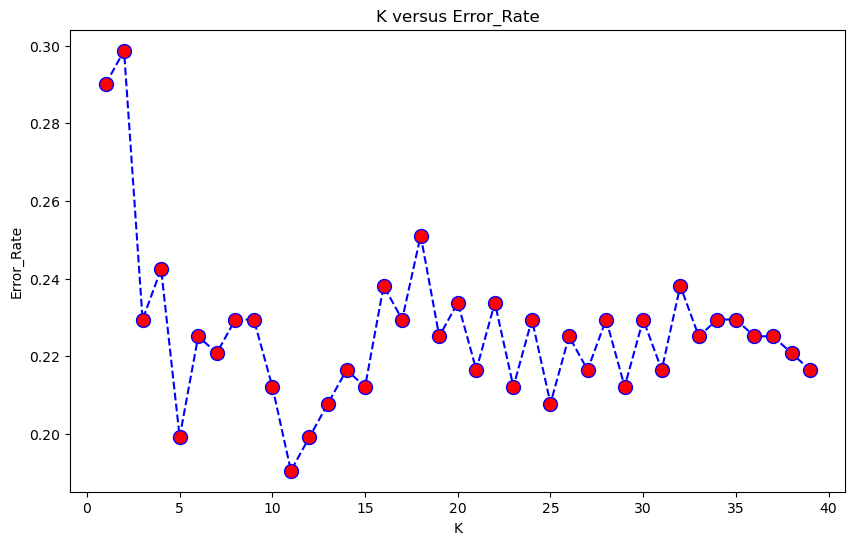

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle="--",markersize=10,markerfacecolor='red',marker='o')
plt.title("K versus Error_Rate")
plt.xlabel("K")
plt.ylabel('Error_Rate')

## We got lowest error rate at k=11

##   confusion_matrix,classification_report with k=1

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_predictict=knn.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predictict))
print(classification_report(y_test,y_predictict))


[[119  27]
 [ 40  45]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       146
           1       0.62      0.53      0.57        85

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.70      0.71      0.70       231



## confusion_matrix,classification_report With k=11

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_predictict=knn.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predictict))
print(classification_report(y_test,y_predictict))


[[134  12]
 [ 32  53]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       146
           1       0.82      0.62      0.71        85

    accuracy                           0.81       231
   macro avg       0.81      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231

